**Étape 1: Chargement des données**

Dans cette étape, nous chargeons les données à partir du fichier CSV à l'aide de la bibliothèque Pandas. Les données sont stockées dans un DataFrame, où la première colonne contient le nom de la classe cible et la deuxième colonne contient les descriptions des produits.

In [1]:
import pandas as pd

# Chargement des données à partir du fichier CSV
data = pd.read_csv('E-commerce_Dataset.csv', header=None, names=['class', 'description'])
# Affichage des premières lignes du DataFrame
data.head()

,class,description
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


**Étape 2: Prétraitement des données**

Le prétraitement des données est une étape importante pour nettoyer et normaliser le texte avant l'extraction des fonctionnalités. Dans cet exemple, nous utilisons la bibliothèque NLTK pour effectuer plusieurs tâches de prétraitement, telles que la mise en minuscules, la suppression des caractères non alphabétiques, la suppression des mots vides (stop words) et le stemming des mots. Cette étape vise à réduire le bruit et à améliorer la qualité des fonctionnalités extraites.

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Téléchargement des ressources NLTK (nécessaire uniquement lors de la première exécution)
#nltk.download('stopwords')
#nltk.download('punkt')

# Prétraitement des descriptions des produits
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    if isinstance(text, str):
        # Conversion en minuscules
        text = text.lower()
        # Tokenization
        tokens = word_tokenize(text)
        # Suppression des caractères non alphabétiques
        tokens = [token for token in tokens if token.isalpha()]
        # Suppression des mots vides
        tokens = [token for token in tokens if token not in stop_words]
        # Reconstitution du texte prétraité
        preprocessed_text = ' '.join(tokens)
        return preprocessed_text
    else:
        return ''

# Application du prétraitement aux descriptions des produits
data['preprocessed_text'] = data['description'].apply(preprocess_text)
# Affichage des premières lignes du DataFrame avec les descriptions prétraitées
data.head()

,class,description,preprocessed_text
0,Household,Paper Plane Design Framed Wall Hanging Motivat...,paper plane design framed wall hanging motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",saf framed painting wood inch x inch special e...
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...,saf textured modern art print framed painting ...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1...",saf flower print framed painting synthetic inc...
4,Household,Incredible Gifts India Wooden Happy Birthday U...,incredible gifts india wooden happy birthday u...


**Étape 3: Extraction de fonctionnalités**

Dans cette étape, nous utilisons le vecteur TfidfVectorizer de la bibliothèque Scikit-learn pour extraire les fonctionnalités à partir des descriptions des produits. Le TfidfVectorizer convertit le texte en une représentation numérique en utilisant la technique TF-IDF (Term Frequency-Inverse Document Frequency). Cela permet de donner plus d'importance aux mots qui apparaissent fréquemment dans un document spécifique et moins d'importance aux mots qui apparaissent fréquemment dans l'ensemble des documents.

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Extraction des fonctionnalités avec TF-IDF
#max_features=200
vectorizer = TfidfVectorizer()
features = vectorizer.fit_transform(data['preprocessed_text'])

# Affichage du nombre de fonctionnalités extraites
print("Nombre de fonctionnalités extraites :", features.shape[1])


Nombre de fonctionnalités extraites : 60701


**Étape 4: Calcul du gain d'information**

Le gain d'information est une mesure utilisée pour évaluer l'importance des fonctionnalités dans la classification. Dans cet exemple, nous utilisons la fonction mutual_info_classif de la bibliothèque Scikit-learn pour calculer le gain d'information de chaque fonctionnalité par rapport à la variable cible (classe). Nous utilisons ensuite la classe SelectKBest pour sélectionner les meilleures fonctionnalités en fonction du gain d'information. Ici, nous sélectionnons les 1000 meilleures fonctionnalités.

In [4]:
from sklearn.feature_selection import SelectKBest, f_classif

# Calcul du gain d'information
info_gain = f_classif(features, data['class'])[0]

# Sélection des meilleures fonctionnalités
k = 8000  # Nombre de meilleures fonctionnalités à sélectionner
selector = SelectKBest(f_classif, k=k)
selected_features = selector.fit_transform(features, data['class'])

# Affichage du nombre de fonctionnalités sélectionnées
print("Nombre de fonctionnalités sélectionnées :", selected_features.shape[1])

Nombre de fonctionnalités sélectionnées : 8000


**Étape 5: Division des données en ensembles d'entraînement et de test**

Pour évaluer les performances du modèle de classification, nous divisons les données en ensembles d'entraînement et de test. Dans cet exemple, nous utilisons la fonction train_test_split de la bibliothèque Scikit-learn pour diviser les fonctionnalités sélectionnées et les étiquettes en deux ensembles distincts. Ici, nous utilisons 80% des données pour l'ensemble d'entraînement et 20% pour l'ensemble de test.

In [5]:
from sklearn.model_selection import train_test_split

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(selected_features, data['class'], test_size=0.2, random_state=42)

# Affichage des dimensions des ensembles d'entraînement et de test
print("Dimensions de l'ensemble d'entraînement :", X_train.shape, y_train.shape)
print("Dimensions de l'ensemble de test :", X_test.shape, y_test.shape)

Dimensions de l'ensemble d'entraînement : (40340, 8000) (40340,)
Dimensions de l'ensemble de test : (10085, 8000) (10085,)


**Étape 6: Entraînement du modèle de classification naïve bayésienne**

Nous utilisons le classificateur naïf bayésien multinomial de la bibliothèque Scikit-learn pour entraîner un modèle de classification. Le classificateur naïf bayésien est souvent utilisé pour la classification de texte car il suppose l'indépendance conditionnelle entre les fonctionnalités. Dans cette étape, nous ajustons le modèle aux données d'entraînement.

In [6]:
from sklearn.naive_bayes import MultinomialNB
# Entraînement du modèle de classification naïve bayésienne
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

**Étape 7: Évaluation du modèle**

Enfin, nous évaluons les performances du modèle en utilisant l'ensemble de test. Nous utilisons la fonction predict du modèle entraîné pour prédire les étiquettes de classe pour les données de test.

[[2150   20   31  186]
 [   3 1682   12   47]
 [  37    4 1894  132]
 [  25   33   68 3761]]
Accuracy : 0.9407040158651463
Rapport de classification :
                         precision    recall  f1-score   support

                 Books       0.97      0.90      0.93      2387
Clothing & Accessories       0.97      0.96      0.97      1744
           Electronics       0.94      0.92      0.93      2067
             Household       0.91      0.97      0.94      3887

              accuracy                           0.94     10085
             macro avg       0.95      0.94      0.94     10085
          weighted avg       0.94      0.94      0.94     10085



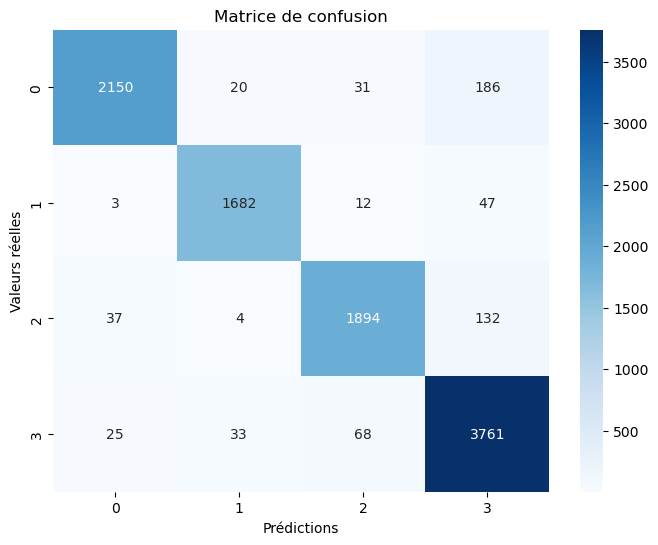

In [8]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Prédictions sur l'ensemble de test
y_pred = nb_classifier.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred)

# Évaluation des performances du modèle
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Affichage des résultats
print(confusion_mat)
print("Accuracy :", accuracy)
print("Rapport de classification :\n", report)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues")
plt.title("Matrice de confusion")
plt.xlabel("Prédictions")
plt.ylabel("Valeurs réelles")
plt.show()